# Payload-range plotter

In [15]:
# imports
import os
import matplotlib.pyplot as plt
import json
from RCAIDE.Framework.Core import Data, Units
import numpy as np

In [16]:
def plot_style():
    plt.rcParams['axes.linewidth'] = 1.
    plt.rcParams["font.family"] = "Times New Roman"
    parameters = {'axes.labelsize': 20,
                  'xtick.labelsize': 14,
                  'ytick.labelsize': 14,
                  'axes.titlesize': 18,
                  'figure.dpi': 200
                  }
    # Universal Plot Settings
    plt.rcParams.update(parameters)
    plot_parameters                        = Data()
    plot_parameters.line_width             = 1
    plot_parameters.line_style             = ['-','-']
    plot_parameters.marker_size            = 4
    plot_parameters.legend_fontsize        = '18'
    plot_parameters.legend_title_font_size = 14
    plot_parameters.axis_font_size         = 14# + 2
    plot_parameters.title_font_size        = 16
    plot_parameters.markers                =  ['o','x','o','v','P','p','^','D','*']
    plot_parameters.color                  = 'red'
    return plot_parameters

plot_style()

{'line_width': 1,
 'line_style': ['-', '-'],
 'marker_size': 4,
 'legend_fontsize': '18',
 'legend_title_font_size': 14,
 'axis_font_size': 14,
 'title_font_size': 16,
 'markers': ['o', 'x', 'o', 'v', 'P', 'p', '^', 'D', '*'],
 'color': 'red'}

In [17]:
directory = "B737_data/"
payload_range_data = {}

for root, dirs, files in os.walk(directory):
    for file in files:
        extension = file.split(".")[-1]
        fuel_name = file.split("_")[0]
        if extension == 'json':
            print(extension, fuel_name)

            with open(directory + file, "r+") as json_file:
                data = json.loads(json_file.read())
                payload_range_data[fuel_name] = data

json Butanol
json Ethane
json Ethanol
json Jet A1
json Liquid Natural Gas
json Liquid Petroleum Gas
json Methane
json Propane
json Propanol


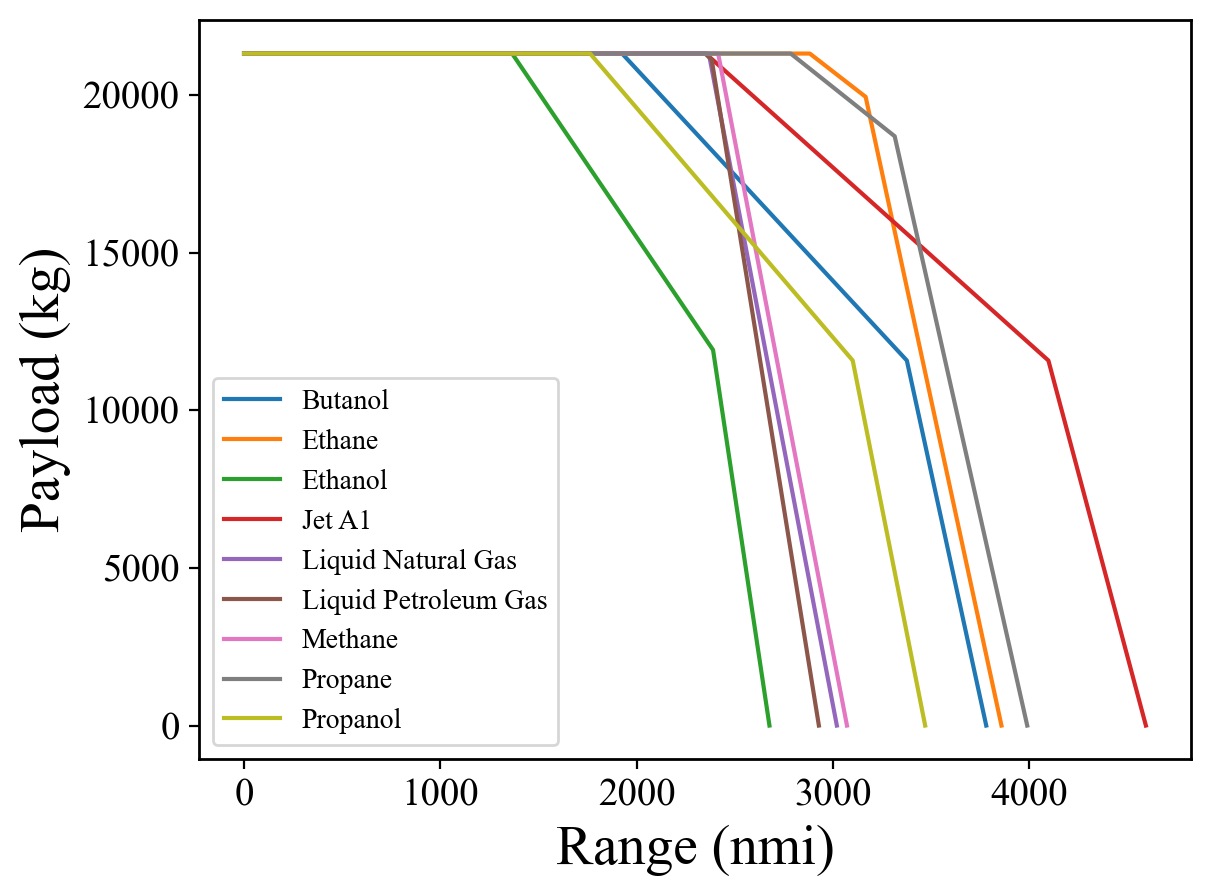

In [18]:

for fuel_name, data in payload_range_data.items():
    range_data = np.array(data['range']) / Units.nmi
    payload_data = data['payload']
    plt.plot(range_data, payload_data, label=fuel_name)

plt.xlabel("Range (nmi)")
plt.ylabel("Payload (kg)")
plt.legend()
plt.show()